<div align="center">
  <b> <font size="6"> Hyperparameter Tuning for Multiple Regression - Exercise</font> </b>
</div>

#### Car Price Prediction

We will find 
<ul>
  <li>optimal number of features - using recursive feature elimination (RFE)</li>
  <li>k-value in cross validation - using grid search (GS) </li> 
</ul>  

In [10]:
# Import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [11]:
# reading the dataset
cars = pd.read_csv("E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# All data preparation steps in this cell
import re 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 

# select specific features and split into x and y
x = cars[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = cars['price']

# creating dummy variables for categorical variables
cars_categorical = x.select_dtypes(include=['object'])
cars_categorical.head()

# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

# drop categorical variables 
x = x.drop(list(cars_categorical.columns), axis=1)

# concat dummy variables with X
x = pd.concat([x, cars_dummies], axis=1)

# rescale the features
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size = 0.3, random_state=40)

In [13]:
# number of features
len(x_train.columns)

43

In [14]:
# creating a KFold object with 5 splits 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:    5.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [15]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038884,0.002353,0.002400,0.001625,2,{'n_features_to_select': 2},0.881340,0.673284,0.882871,0.643727,...,0.759411,0.102770,27,0.762090,0.809346,0.780621,0.798515,0.798908,0.789896,0.016691
1,0.037378,0.001355,0.002599,0.000490,3,{'n_features_to_select': 3},0.892657,0.720574,0.835474,0.675851,...,0.713387,0.156172,37,0.808676,0.868796,0.833966,0.850420,0.845840,0.841540,0.019888
2,0.035098,0.003161,0.003000,0.002449,4,{'n_features_to_select': 4},0.884742,0.744381,0.819150,0.695744,...,0.712963,0.159642,38,0.820593,0.890003,0.843983,0.853084,0.860087,0.853550,0.022581
3,0.036077,0.003595,0.002000,0.001897,5,{'n_features_to_select': 5},0.869541,0.758867,0.853019,0.711072,...,0.724029,0.159396,36,0.850299,0.903691,0.857307,0.862113,0.862891,0.867260,0.018759
4,0.036179,0.004212,0.002000,0.000633,6,{'n_features_to_select': 6},0.857359,0.759931,0.856447,0.692448,...,0.726327,0.144522,35,0.863832,0.906496,0.865698,0.895723,0.866674,0.879685,0.017845
5,0.032271,0.001795,0.000800,0.000979,7,{'n_features_to_select': 7},0.848291,0.774516,0.844838,0.645008,...,0.741160,0.104395,33,0.878932,0.912412,0.872259,0.905489,0.885241,0.890867,0.015481
6,0.032176,0.001985,0.001409,0.001962,8,{'n_features_to_select': 8},0.856797,0.772164,0.865752,0.685292,...,0.751166,0.109374,29,0.879152,0.916877,0.877898,0.908631,0.894029,0.895317,0.015547
7,0.032614,0.003171,0.003413,0.001977,9,{'n_features_to_select': 9},0.845066,0.775609,0.867770,0.685736,...,0.744943,0.116062,32,0.886022,0.917305,0.882350,0.909643,0.899599,0.898984,0.013374
8,0.030372,0.003487,0.003298,0.002749,10,{'n_features_to_select': 10},0.864097,0.778355,0.886196,0.589406,...,0.729735,0.144385,34,0.893817,0.917886,0.909495,0.929191,0.905300,0.911138,0.011902
9,0.031442,0.001785,0.002504,0.001607,11,{'n_features_to_select': 11},0.864097,0.782456,0.836851,0.633530,...,0.746908,0.102626,31,0.893817,0.926743,0.913194,0.935141,0.913816,0.916542,0.014036


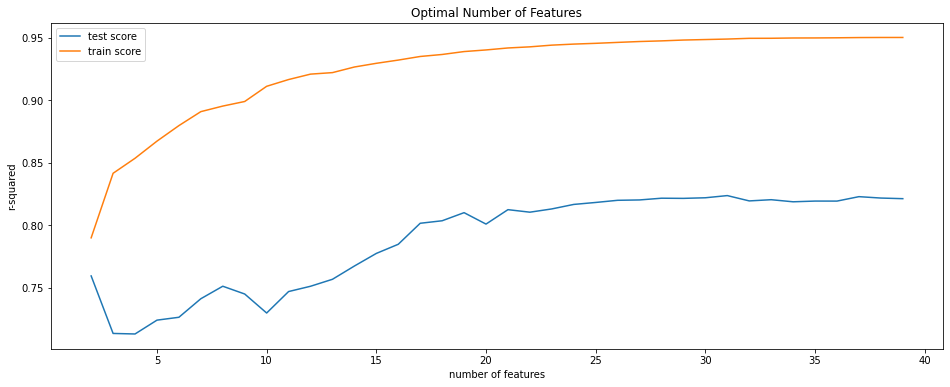

In [16]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')